In [37]:
%load_ext autoreload
%autoreload 2
import cieran
from ipywidgets import widgets
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ColorPicker(value='blue', description='Pick a color')

In [5]:
import cieran
import numpy as np
import matplotlib.pyplot as plt

def draw_chart(cmap):

    t = np.linspace(0, 2 * np.pi, 1024)
    data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]
    # Draw a chart of data2d with the given colormap
    fig, ax = plt.subplots()
    ax.imshow(data2d, cmap=cmap)

    plt.show()

env = cieran.initialize('#fff9db')

In [12]:
import ipywidgets as widgets
from IPython.display import display



# define the colors you want to use
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000', '#FFFFFF','#FF0000', '#00FF00', '#0000FF', '#FFFF00',]

# create a list to store the buttons
buttons = []

# create a loop to generate the buttons
for color in colors:
    button = widgets.Button(description='', layout=widgets.Layout(width='30px', height='30px'))
    button.style.button_color = color
    buttons.append(button)

# create a grid box to display the buttons
grid = widgets.GridBox(buttons, layout=widgets.Layout(grid_template_columns='repeat(4, 30px)',
                                                      grid_template_rows='repeat(2, 30px)'))

# display the grid box
display(grid)

GridBox(children=(Button(layout=Layout(height='30px', width='30px'), style=ButtonStyle(button_color='#FF0000')…

In [12]:
len(env.centroids)

1290

In [11]:

for centroid in env.centroids:
    env = cieran.initialize(list(centroid))
    num_ramps.append(len(env.fitted_ramps))
    print("Color: " + str(list(centroid)) + ", # of ramps: " + str(len(env.fitted_ramps)))

TypeError: '<class 'list'>' is an unrecognized type

In [126]:
env, top = cieran.query(env, render=draw_chart)

Estimated user parameters: {'weights': array([-0.67849755,  0.18525968, -0.12326084,  0.2733963 ,  0.29167938,
       -0.57282069,  0.04669847])}
Trajectory 1: [0.43989362 0.21172866 0.5435495  0.38473992 0.70711222 0.70987975
 0.65271581]
Trajectory 2: [0.23998771 0.836022   0.45324093 0.6644198  0.44923091 0.58993211
 0.58053759]
Objective Value: 0.01968233493643723


Output()

Which trajectory is the best? Enter a number (0 for "About Equal"): `


ValueError: invalid literal for int() with base 10: '`'

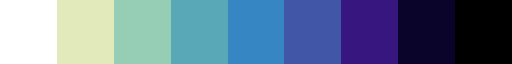

In [120]:

top.ramp.resampled(9)

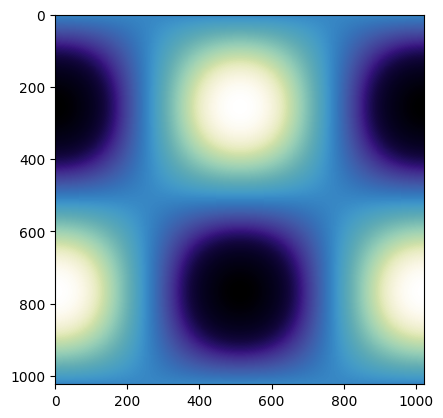

In [121]:
draw_chart(top.ramp)

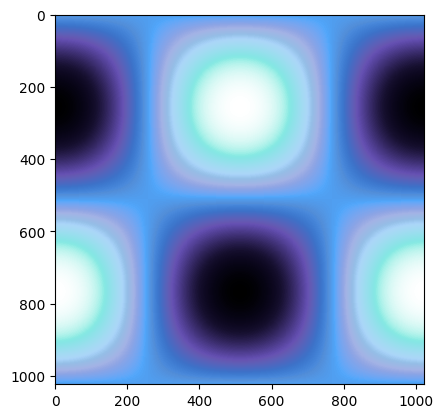

In [27]:
draw_chart(trajectory.ramp)

In [34]:
trajectory.in_gamut

In [122]:
from collections import defaultdict
import networkx as nx
# path = nx.shortest_path(env.graph, source=(100, 0, 0), target=(0,0,0))
# path = [(100, 0, 0), (48.325, -19.2993, -16.5717), (0,0,0)]
path = top.trajectory.copy()

env.discount= 1
env.lr = 0.1
env.Q = defaultdict(float)

env.epsilon = 0.1

env.Q.default_factory = lambda: 0.0
for i in range(len(path)-1):
    env.Q[(tuple(path[i]), tuple(path[i+1]))] = 10.0

trajectory, history, reward_history = cieran.train(env)

Learning...


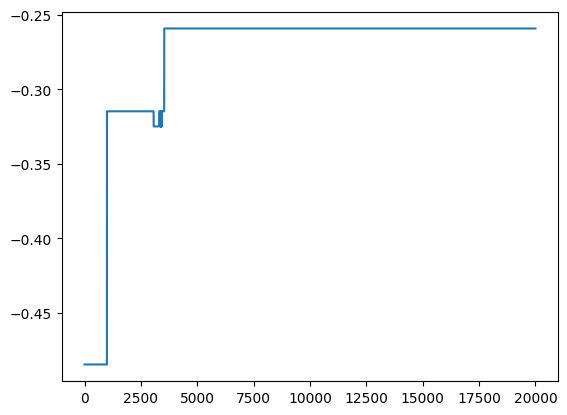

In [123]:
plt.plot(reward_history)

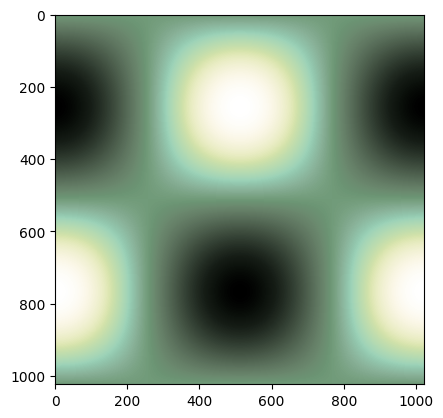

In [124]:
draw_chart(trajectory.ramp)

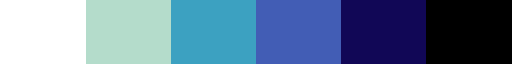

In [71]:
trajectory.ramp.resampled(6)

In [99]:
np.dot(top.features, env.reward_weights)

0.5932391904174268

In [23]:
np.dot(trajectory.features, env.reward_weights)

0.22582889958425037

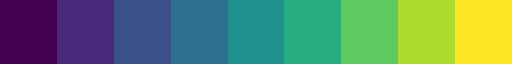

In [88]:
plt.get_cmap('viridis', 255).resampled(9)

In [11]:
print(traj.trajectory)

[array([0, 0, 0]), array([ 19.2989826 ,  41.74382203, -38.76011605]), array([ 32.28726385,  27.86865056, -41.53451605]), array([ 37.48745916,  -2.38207341, -36.01835605]), array([ 50.01187323, -21.99646146, -15.25931605]), array([ 51.50113104, -34.32994721,   6.33204395]), array([ 62.27993963, -45.39380943,  27.61332395]), array([ 70.80044744, -44.6164889 ,  49.12308395]), array([ 82.76333807, -28.52595392,  72.16692395]), array([85.80288885, -7.81036178, 78.41748395]), array([100,   0,   0])]


In [ ]:
# env.reward_weights = np.array([ 0.18317659,  0.84481028, -0.1860568 ,  0.46703832])
# env.reward_weights = np.array([ -0.18317659,  -0.84481028, -0.1860568 ,  0.46703832])
# env.reward_weights = np.array([ -0.18317659,  0.84481028, -0.1860568 ,  0.46703832])
# env.reward_weights = np.array([ -0.18317659,  -0.84481028, -0.1860568 ,  -0.46703832])
# env.reward_weights = np.array([ -0.18317659,  -0.84481028, 0.1860568 ,  0.46703832])
env.reward_weights = np.array([ 2.47990152, 2.81855532,  -1.81744544])

In [37]:
traj.trajectory

[array([100,   0,   0]),
 array([ 85.30923642, -74.00723133,  74.73660279]),
 array([ 84.25332821, -72.94489327,  63.24732279]),
 array([ 74.91494931, -54.91105697,  49.40796279]),
 array([ 64.78311337, -40.27152031,  28.06140279]),
 array([ 54.39492978, -27.66597237,  10.53372279]),
 array([ 49.90274228, -10.52605468, -37.20227721]),
 array([ 33.30117978,   5.91427454, -51.07427721]),
 array([0, 0, 0])]

In [46]:
env.Q

defaultdict(<function __main__.<lambda>()>,
            {((100, 0, 0),
              (88.3428177240054,
               -1.941576683022788,
               79.0147672465182)): 4.771697832511034,
             ((88.3428177240054, -1.941576683022788, 79.0147672465182),
              (80.1152786615054,
               -29.769651671591618,
               70.78948724651823)): 5.28689909255995,
             ((80.1152786615054, -29.769651671591618, 70.78948724651823),
              (71.3628372552554,
               -45.00513406756784,
               46.75012724651822)): 5.819614568688725,
             ((71.3628372552554, -45.00513406756784, 46.75012724651822),
              (65.0090774896304,
               -49.137888220898105,
               22.025327246518202)): 6.319286997630649,
             ((65.0090774896304, -49.137888220898105, 22.025327246518202),
              (62.04887241150539,
               -33.85058445622809,
               1.0214872465182054)): 6.808875944044133,
             ((62

In [31]:
trajectory.trajectory

[(100, 0, 0),
 (59.50645018833956, -22.81595754246017, -30.173949569856163),
 (57.38242675083956, -25.562490083231395, -19.76178956985615),
 (46.62192870396456, -15.612787294022425, -18.864189569856165),
 (40.60996581333956, -0.42912626673991383, -32.29554956985618),
 (26.925883782089556, 26.46616408534058, -46.41234956985615),
 (18.783793938339556, 28.37059938483759, -29.113149569856176),
 (18.356547844589556, -15.548010583155175, 5.909570430143901),
 (10.928569328964555, -15.729385373583483, 14.036930430143912),
 (0, 0, 0)]

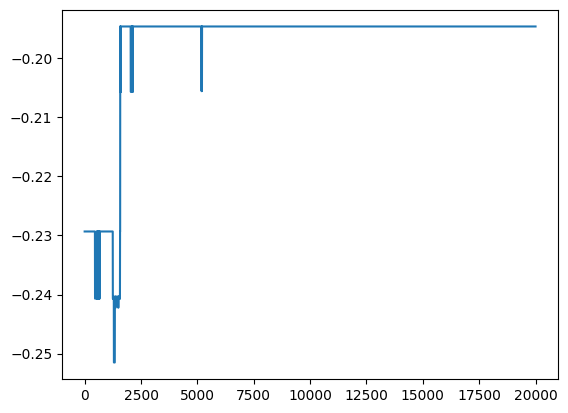

In [124]:
plt.plot(reward_history)

In [75]:
env.Q

defaultdict(<function __main__.<lambda>()>,
            {((100, 0, 0),
              (88.3428177240054,
               -1.941576683022788,
               79.0147672465182)): 4.794906939536019,
             ((88.3428177240054, -1.941576683022788, 79.0147672465182),
              (80.1152786615054,
               -29.769651671591618,
               70.78948724651823)): 5.2983123643131655,
             ((80.1152786615054, -29.769651671591618, 70.78948724651823),
              (71.3628372552554,
               -45.00513406756784,
               46.75012724651822)): 5.801277337696868,
             ((71.3628372552554, -45.00513406756784, 46.75012724651822),
              (65.0090774896304,
               -49.137888220898105,
               22.025327246518202)): 6.280669393719268,
             ((65.0090774896304, -49.137888220898105, 22.025327246518202),
              (62.04887241150539,
               -33.85058445622809,
               1.0214872465182054)): 6.80604500982903,
             ((6

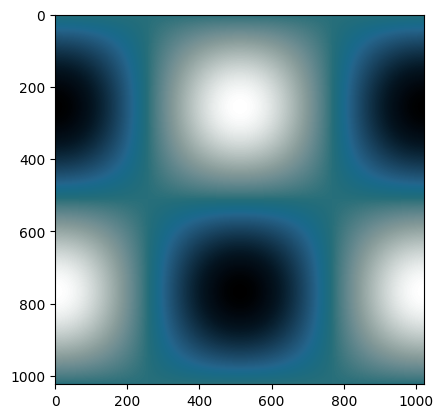

In [95]:
draw_chart(trajectory.ramp)

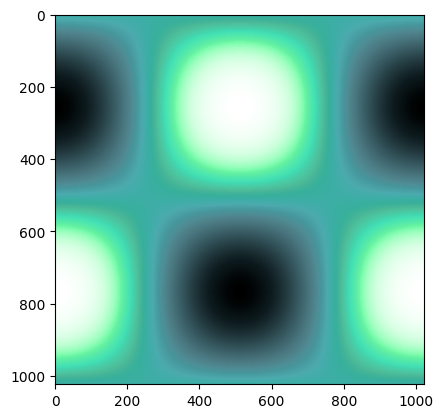

In [73]:
draw_chart(traj.ramp)

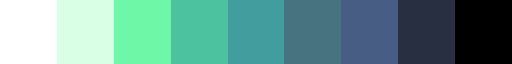

In [85]:
trajectory.ramp.resampled(9)

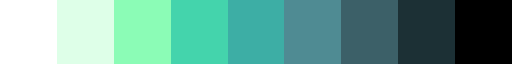

In [86]:
traj.ramp.resampled(9)

In [89]:
from coloraide import Color
def in_gamut(c):
    return c.in_gamut('srgb')

at = np.linspace(0, 1, 256)
import numpy as np
gamut_test = []
points = [trajectory._curve(index) for index in at]
for point in points:
    gamut_test.append(in_gamut(point))

np.array(gamut_test) == False

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [76]:
trajectory._curve(0.5)

color(--lab 61.424 -31.468 -7.1128 / 1)

In [64]:
trajectory._curve.evaluate_list(at)

[[100.0, 0.0, 0.0],
 [98.27289503753066, -0.37766967063514184, 0.752330545325043],
 [96.60432662403977, -0.7396161514290356, 1.4311844134220255],
 [94.99312164206984, -1.086340250833193, 2.038828583346614],
 [93.43810697416336, -1.4183427772991266, 2.577530034154478],
 [91.93810950286294, -1.736124539278349, 3.0495557449012822],
 [90.491956110711, -2.040186345222372, 3.457172694642695],
 [89.09847368025012, -2.331029003582707, 3.802647862434382],
 [87.75648909402288, -2.6091533228108688, 4.088248227332012],
 [86.46482923457171, -2.875060111358367, 4.316240768391251],
 [85.22232098443915, -3.129250177676714, 4.4888924646677655],
 [84.02779122616776, -3.3722243302174237, 4.608470295217224],
 [82.88006684230005, -3.6044833774320075, 4.677241239095293],
 [81.77797471537856, -3.8265281277719785, 4.697472275357642],
 [80.72034172794578, -4.038859389688846, 4.671430383059933],
 [79.70599476254424, -4.2419779716341255, 4.601382541257836],
 [78.73376070171653, -4.4363846820593285, 4.48959572900

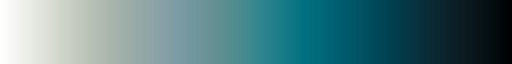

In [58]:
traj.ramp

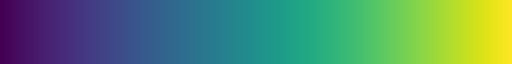

In [56]:
viridis

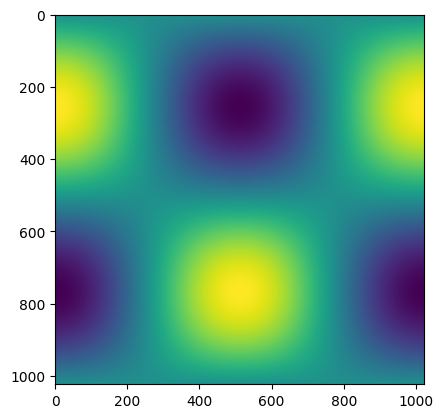

In [54]:
viridis = plt.get_cmap('viridis', 255)
draw_chart(viridis)

In [215]:
path

[(100, 0, 0), (48.325, -19.2993, -16.5717), (0, 0, 0)]

In [216]:
env.color

[48.325, -19.2993, -16.5717]

In [214]:
history[-1]

[(100, 0, 0),
 (47.40347601088034, -20.101826387711185, -13.478379931811418),
 (38.66324163588034, -2.340052267912384, -15.681579931811427),
 (0, 0, 0)]

In [25]:
env.color

[48.325, -19.2993, -16.5717]

In [91]:
np.argmax(reward_history)

8230

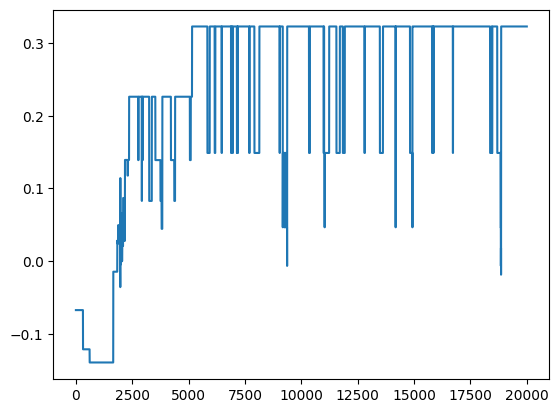

In [14]:
plt.plot(reward_history)

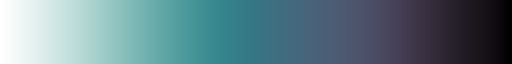

In [212]:
cmap

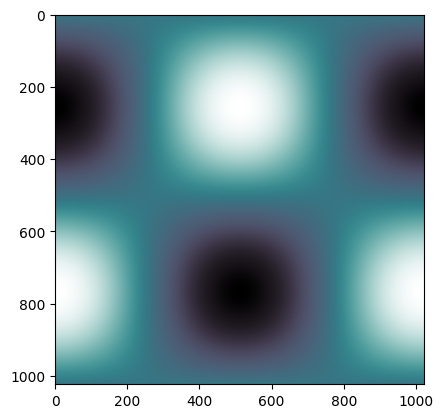

In [213]:
draw_chart(cmap)

In [220]:
history[-1]

[(100, 0, 0),
 (52.540344653934945, -19.13419183310411, -18.791928850812837),
 (36.793274341434945, 5.066387346899006, -33.90424885081285),
 (27.192444263309945, 28.39895860128098, -50.07736885081283),
 (18.494934497684945, 31.14549114205215, -28.95928885081284),
 (13.422913013309945, -16.37470395015943, 11.53063114918723),
 (0, 0, 0)]

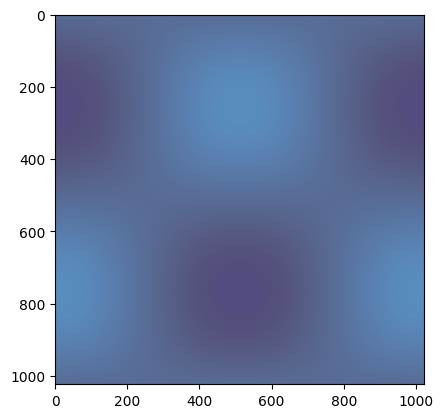

In [321]:
draw_chart(cmap)

In [187]:
history[-1]

[(100, 0, 0),
 (95.35497756985536, -1.8515769710533334, -0.3360292267404219),
 (86.19970413235536, -6.6709642595764365, -10.6992292267404),
 (77.58154006985536, -13.86117916584071, -21.960029226740374),
 (67.29101272610536, -16.555890337918157, -20.344349226740377),
 (56.67089553860536, -22.21737486771542, -22.25378922674038),
 (47.02123733548036, -15.19557940970597, -25.289309226740386),
 (34.29540725735536, -4.805394986599751, -26.2521892267404),
 (0, 0, 0)]

In [8]:
import networkx as nx
distance(nx.dag_longest_path(env.graph))

414.48168477836606

In [7]:
def distance(trajectory):
    # Compute euclidean distance between points
    return sum([np.sqrt((trajectory[i+1][0] - trajectory[i][0])**2 + (trajectory[i+1][1] - trajectory[i][1])**2 + (trajectory[i+1][2] - trajectory[i][2])**2) for i in range(len(trajectory) - 1)])


In [90]:
env.run()
print(env.trajectory)
env.reset()

[(100, 0, 0), (67.24218460110536, -11.490351548099511, -28.993949226740384), (56.75634475735536, -7.603748896064758, -31.392989226740397), (52.34350296048036, -12.980215898046183, -36.0115492267404), (0, 0, 0)]


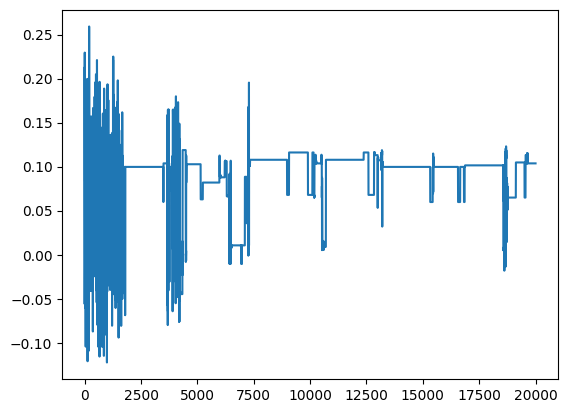

In [322]:
plt.plot(reward_history)

In [28]:
reward_history[900]

0.8443879585272268

In [29]:
history[900]

[(100, 0, 0),
 (80.32812210110536, 6.349154624739981, 22.822050773259548),
 (75.90917678860536, -6.126839888291556, 0.34941077325959213),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (63.79980178860536, -1.9293090240940245, -51.466589226740396),
 (51.58056350735536, 8.953178401603282, -64.84898922674041),
 (44.72021194485536, 34.99341617023612, -82.18082922674043),
 (29.302731476105357, 59.116263297198486, -83.01314922674041),
 (0, 0, 0)]

In [23]:
reward_history[581]

0.2007705868712833

In [21]:
history[581]

[(100, 0, 0),
 (89.03173538235536, 16.065661254826892, -13.555229226740394),
 (78.49706741360536, 3.4342026357139446, -25.109789226740403),
 (77.58154006985536, -13.86117916584071, -21.960029226740374),
 (67.29101272610536, -16.555890337918157, -20.344349226740377),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (64.20873733548036, -5.05154648789528, -33.44930922674038),
 (57.80614944485536, -1.151988493687071, -40.564829226740386),
 (47.88183303860536, -2.6288975014602727, -37.757789226740414),
 (37.44482131985536, -16.309738836622614, -23.18402922674038),
 (37.39599319485536, -10.829629097253616, -31.833629226740385),
 (29.864254913605357, -8.808595718195534, -22.33538922674039),
 (24.566403351105357, 1.4002139144824355, -22.22114922674038),
 (23.583737335480357, -14.495990932339737, -13.049309226740377),
 (12.77441116360536, -5.31065333136425, -13.767389226740391),
 (0, 0, 0)]

In [15]:
viridis = plt.get_cmap('viridis', 255)

<IPython.core.display.Javascript object>


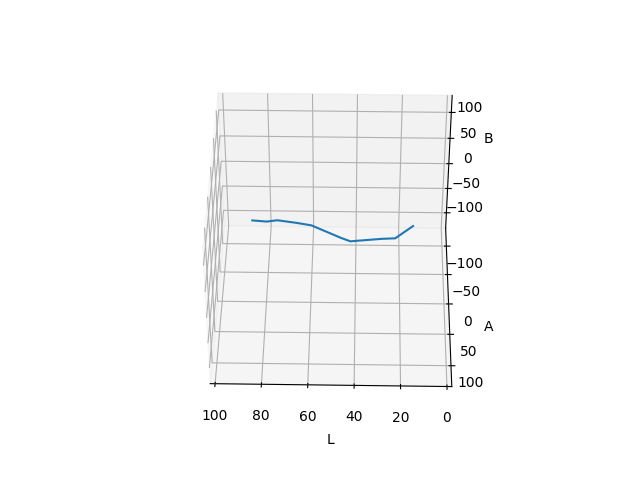

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a 3D line chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ramp = np.array(history[0][1:-1])
line, = ax.plot(ramp[:,0], ramp[:,1], ramp[:,2])

ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')
              
ax.set_xlim(0, 100)
ax.set_ylim(-127, 127)
ax.set_zlim(-127, 127)

# Define the update function
def update(i):
    # Generate new data
    ramp = np.array(history[i][1:-1])

    # Update the line chart data
    line.set_data(ramp[:,0], ramp[:,1])
    line.set_3d_properties(ramp[:,2])

    # Return the updated plot objects
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=1000, interval=10, blit=True)

# Show the plot
plt.show()


In [12]:
history[-1]

[(100, 0, 0),
 (88.63078380106899, -54.14830654646491, 25.778645014479054),
 (86.29313731669399, -53.047102461721735, 7.647125014479002),
 (79.76847911356899, -49.277097889248026, 10.22568501447904),
 (73.33537364481899, -47.23015382584306, 10.845845014479039),
 (71.16252208231899, -43.46014925336934, -2.0306349855209618),
 (61.88517833231899, -38.446431832244514, -3.009834985520982),
 (59.80998301981899, -28.807657255198336, -10.02743498552097),
 (53.99943614481899, -26.242499504855402, -19.264554985520988),
 (52.52238536356899, -21.293558794597814, -22.577514985520978),
 (46.52873301981899, -16.21506466260574, -19.81943498552097),
 (39.88810801981899, -12.36732803709134, -7.987434985520977),
 (28.68205333231899, -14.310629363108717, -18.513834985520973),
 (21.17472911356899, -9.400554679371481, -18.742314985520977),
 (10.93302989481899, -3.7390701495742036, -18.04055498552097),
 (0, 0, 0)]

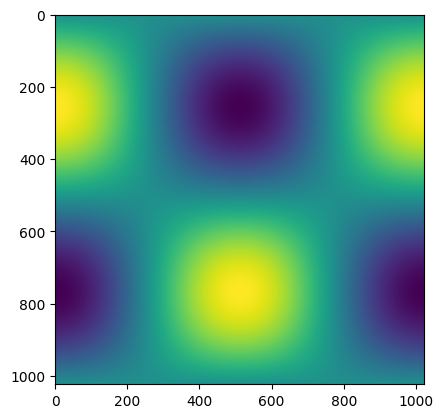

In [17]:
draw_chart(viridis)

In [ ]:
# Draw a random plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ipywidgets import Output, Tab

# Show random data
x = np.linspace(0, 10, 100)
y = np.random.rand(100)

# Create a figure and show
def chart():
    plt.scatter(x, y)
    plt.show()

# Create an output widget
out = Output()
display(out)

with out:
    # Display the figure
    plt.scatter(x, y)
    plt.show()

In [ ]:
from IPython.display import clear_output
with out:
    clear_output()

<IPython.core.display.Javascript object>


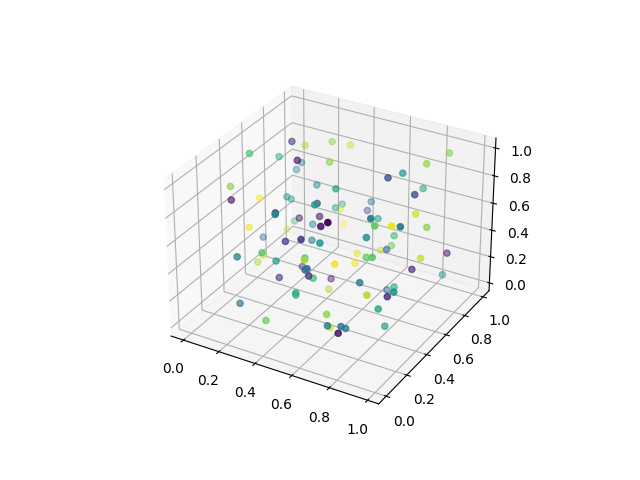

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate initial data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
c = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c)

# Define the update function
def update(i):
    # Generate new data
    x = np.random.rand(100)
    y = np.random.rand(100)
    z = np.random.rand(100)
    c = np.random.rand(100)

    # Update the scatter plot data
    scatter._offsets3d = (x, y, z)
    scatter.set_array(c)

    # Return the updated plot objects
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=10, interval=10, blit=True)

# Show the plot
plt.show()
